In [ ]:
import nltk
nltk.download(['gutenberg', 'punkt'])
from nltk.corpus import gutenberg

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.




## 1) Посчитать суммарное количество слов в gutenberg_raw (через simple_job)

In [ ]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
%time len(tokenizer.tokenize(gutenberg.raw())) # число слов в gutenberg.raw

CPU times: user 726 ms, sys: 39.2 ms, total: 765 ms
Wall time: 765 ms


2199219

In [ ]:
import pandas as pd
from typing import Callable, Iterable
from typing import List, Tuple
from typing import Dict, Any

from collections import defaultdict

def merge_layer(pairs: List[Tuple]) -> Dict[Any, List]:
  result = defaultdict(list)
  for k, v in pairs:
    result[k].append(v)
  return dict(result)

def map_layer(mapper: Callable) -> Callable:
  def inner(records: Iterable) -> List[Tuple]:
    return [(k, v) for r in records for k, v in mapper(r)]
  return inner

def reduce_layer(reducer: Callable) -> Callable:
  def inner(merged: Dict[Any, List]) -> Dict:
    return {k: reducer(v) for k, v in merged.items()}
  return inner  

def simple_job(mapper: Callable, reducer:Callable) -> Callable:
  m = map_layer(mapper)
  r = reduce_layer(reducer)
  def inner(records: List) -> Dict:
    return dict(r(merge_layer(m(records))))
  return inner


wordcounter = simple_job(
    lambda f: ((token, 1) for token in tokenizer.tokenize(f)),sum)
gutenberg_raw = [gutenberg.raw(f) for f in gutenberg.fileids()]


%time result = wordcounter(gutenberg_raw)

pass

sum(result.values())
#sorted(result.items(), key=lambda pair: -pair[1])[:20]

CPU times: user 1.93 s, sys: 108 ms, total: 2.04 s
Wall time: 2.04 s


2199219

In [ ]:
%time
num_words = 0

for fileid in gutenberg.fileids():
    num_words += len(gutenberg.words(fileid))

print(f"Количество слов: {num_words}")

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 38.9 µs
Количество слов: 2621613


## 2) Посчитать суммарное количество слов и суммарное количество предложений одним запуском simple_job(...)(guten_raw)

In [ ]:
%time

from nltk.tokenize.punkt import PunktSentenceTokenizer

sentence_tokenizer = PunktSentenceTokenizer() # разбиение на предложения
sentences = sentence_tokenizer.tokenize(gutenberg.raw())
len(sentences)

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 16 µs


98047

In [142]:
import pandas as pd
from typing import Callable, Iterable
from typing import List, Tuple
from typing import Dict, Any

from collections import defaultdict

def merge_layer(pairs: List[Tuple]) -> Dict[Any, List]:
  result = defaultdict(list)
  for k, v in pairs:
    result[k].append(v)
  return dict(result)

def map_layer(mapper: Callable) -> Callable:
  def inner(records: Iterable) -> List[Tuple]:
    return [(k, v) for r in records for k, v in mapper(r)]
  return inner

def reduce_layer(reducer: Callable) -> Callable:
  def inner(merged: Dict[Any, List]) -> Dict:
    return {k: reducer(v) for k, v in merged.items()}
  return inner  

def simple_job(mapper: Callable, reducer:Callable) -> Callable:
  m = map_layer(mapper)
  r = reduce_layer(reducer)
  def inner(records: List) -> Dict:
    return dict(r(merge_layer(m(records))))
  return inner

sentence = simple_job( #word_tokenize(
    lambda f: ((sentence, len(RegexpTokenizer(r'\w+').tokenize(sentence))) for sentence in PunktSentenceTokenizer().tokenize(f)), sum)
gutenberg_raw = [gutenberg.raw(f) for f in gutenberg.fileids()]

%time result = sentence(gutenberg_raw)

pass

print(f'Количество предложений: {len(result)}, Количество слов: {sum(result.values())}')

CPU times: user 3.56 s, sys: 15.5 ms, total: 3.58 s
Wall time: 3.6 s
Количество предложений: 94130, Количество слов: 2199219


## 4) Найти (с помощью simple_job) самое длинное предложение в gutenberg_raw (1242 слова если делить на предложения и слова с помощью PunctSentenceTokenizer и word_tokenize)

In [ ]:
from nltk.tokenize.punkt import PunktSentenceTokenizer
from nltk.tokenize import RegexpTokenizer

sentence_tokenizer = PunktSentenceTokenizer()
sentences = sentence_tokenizer.tokenize(gutenberg.raw())

tokenizer = RegexpTokenizer(r'\w+')
%time len(tokenizer.tokenize(max(sentences, key=len))) 

CPU times: user 7.81 ms, sys: 0 ns, total: 7.81 ms
Wall time: 7.71 ms


1142

In [167]:
sorted(result.items(), key=lambda pair: -pair[1])[:1]

[('e', 13391)]

## 3) Посчитать с помощью simple_job гистограмму распределения размера предложений (в словах) по датасету

In [207]:
import pandas as pd
from typing import Callable, Iterable
from typing import List, Tuple
from typing import Dict, Any

from collections import defaultdict
from nltk.tokenize import sent_tokenize

alice_sentences = sent_tokenize(gutenberg.raw('carroll-alice.txt'))

def merge_layer(pairs: List[Tuple]) -> Dict[Any, List]:
  result = defaultdict(list)
  for k, v in pairs:
    result[k].append(v)
  return dict(result)

def map_layer(mapper: Callable) -> Callable:
  def inner(records: Iterable) -> List[Tuple]:
    return [(k, v) for r in records for k, v in mapper(r)]
  return inner

def reduce_layer(reducer: Callable) -> Callable:
  def inner(merged: Dict[Any, List]) -> Dict:
    return {k: reducer(v) for k, v in merged.items()}
  return inner  

def simple_job(mapper: Callable, reducer:Callable) -> Callable:
  m = map_layer(mapper)
  r = reduce_layer(reducer)
  def inner(records: List) -> Dict:
    return dict(r(merge_layer(m(records))))
  return inner

  
sentence = simple_job(
    lambda f: ((sentence, len(RegexpTokenizer(r'\w+').tokenize(sentence))) for sentence in PunktSentenceTokenizer().tokenize(f)), sum)

%time result = sentence(alice_sentences)

pass

print(f'Количество предложений: {len(result)}, Количество слов: {sum(result.values())}')

CPU times: user 68.6 ms, sys: 0 ns, total: 68.6 ms
Wall time: 69 ms
Количество предложений: 1577, Количество слов: 27336


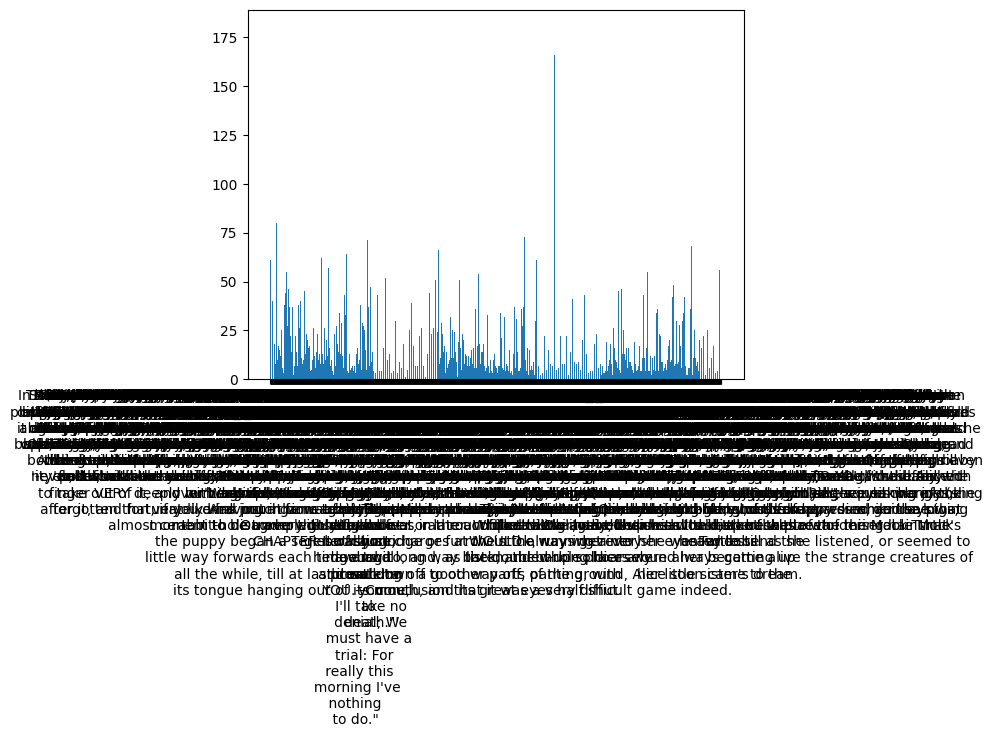

In [173]:
import matplotlib.pyplot as plt

plt.bar(result.keys(), result.values())

plt.show()

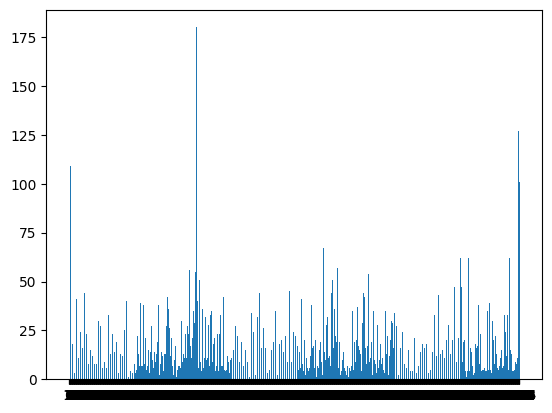

In [205]:
import matplotlib.pyplot as plt

xtic = []
for sublist in list(enumerate(result.keys())):
    xtic.extend([sublist[0]])
print(xtic)

plt.bar(range(len(result)), result.values())
plt.xticks(range(len(result)), xtic)

plt.show()